In [39]:
#从datasets中加载数据
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
digits=datasets.load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

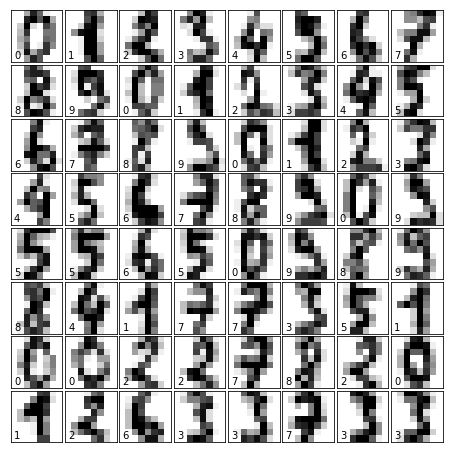

In [32]:
#指定画布的height,weight,单位为:英寸
fig = plt.figure(figsize=(6, 6))

# 调整子图的边距
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#画64张图片
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

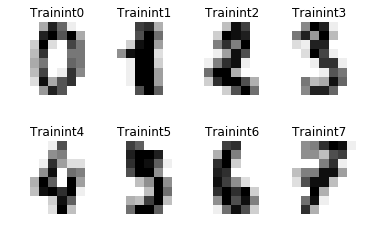

In [35]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))
#绘画前8个图片
for index,(image,label) in enumerate(images_and_labels[:8]):
    plt.subplot(2,4,index+1)
    plt.axis("off")
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title("Trainint"+str(label))
plt.show()

In [41]:
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(svd_solver='randomized',n_components=2) 

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946454  21.27488765]
 [  7.95761582 -20.76869509]
 [  6.99191945  -9.95599253]
 ...
 [ 10.80128262  -6.96025716]
 [ -4.87209891  12.42396125]
 [ -0.34439545   6.36554191]]
[[ -1.25946688  21.27488498]
 [  7.957615   -20.76870017]
 [  6.99192575  -9.95599373]
 ...
 [ 10.80127862  -6.96024991]
 [ -4.87208144  12.42393205]
 [ -0.34439919   6.36555617]]


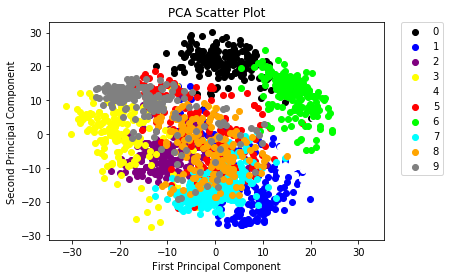

In [42]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()